In [1]:
import pandas as pd
from sklearn.model_selection import RepeatedStratifiedKFold, train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
import csv

In [2]:
with open('train.csv', 'r') as f:
    train = pd.read_csv(f)
    
with open('test.csv', 'r') as f:
    test = pd.read_csv(f)

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train.shape

(42000, 785)

In [5]:
train.label.unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6], dtype=int64)

In [6]:
X = train.iloc[:,1:].copy()
y = train.label.copy()
X

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=7)

In [8]:
xgb = XGBClassifier(objective='mutli:softmax', verbose=3)
xgb.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=10, eval_metric='merror')

[0]	validation_0-merror:0.310381
Will train until validation_0-merror hasn't improved in 10 rounds.
[1]	validation_0-merror:0.249333
[2]	validation_0-merror:0.222667
[3]	validation_0-merror:0.212286
[4]	validation_0-merror:0.202095
[5]	validation_0-merror:0.194667
[6]	validation_0-merror:0.190762
[7]	validation_0-merror:0.186476
[8]	validation_0-merror:0.180667
[9]	validation_0-merror:0.173333
[10]	validation_0-merror:0.169619
[11]	validation_0-merror:0.16619
[12]	validation_0-merror:0.162857
[13]	validation_0-merror:0.161143
[14]	validation_0-merror:0.157048
[15]	validation_0-merror:0.152762
[16]	validation_0-merror:0.150952
[17]	validation_0-merror:0.149048
[18]	validation_0-merror:0.146286
[19]	validation_0-merror:0.143429
[20]	validation_0-merror:0.14019
[21]	validation_0-merror:0.139238
[22]	validation_0-merror:0.137333
[23]	validation_0-merror:0.135143
[24]	validation_0-merror:0.133333
[25]	validation_0-merror:0.131714
[26]	validation_0-merror:0.129143
[27]	validation_0-merror:0.

XGBClassifier(objective='multi:softprob', verbose=3)

In [9]:
xgb.score(X_test, y_test)

0.929047619047619

In [10]:
pred = xgb.predict(X_test)
pred[:10]

array([0, 0, 7, 1, 0, 5, 2, 3, 7, 4], dtype=int64)

In [11]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1033
           1       0.96      0.99      0.97      1171
           2       0.94      0.92      0.93      1044
           3       0.92      0.89      0.90      1088
           4       0.92      0.92      0.92      1018
           5       0.91      0.92      0.92       949
           6       0.96      0.95      0.96      1034
           7       0.95      0.92      0.93      1100
           8       0.89      0.91      0.90      1016
           9       0.87      0.89      0.88      1047

    accuracy                           0.93     10500
   macro avg       0.93      0.93      0.93     10500
weighted avg       0.93      0.93      0.93     10500



In [12]:
print(confusion_matrix(y_test, pred))

[[1008    0    2    3    2    2    5    1    9    1]
 [   0 1155    5    0    1    2    1    0    7    0]
 [   7    8  957   14   13    2    7   15   16    5]
 [   4   10   21  963    1   34    4   11   29   11]
 [   2    2    2    1  938    0    7    2   13   51]
 [   6    3    4   18    7  875   14    3    8   11]
 [   6    2    2    0    8   18  986    1   11    0]
 [   6    7   17    7    6    1    0 1016    6   34]
 [   1   12    8   23    2   21    4    4  920   21]
 [   3    8    2   17   38    5    0   22   15  937]]


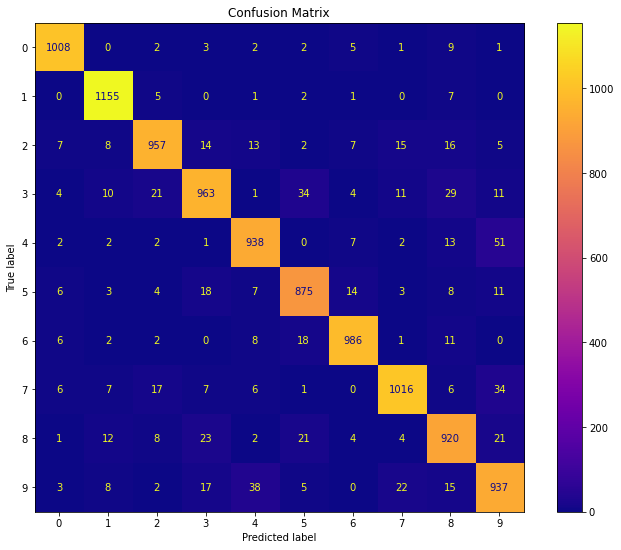

In [13]:
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot()
plot_confusion_matrix(xgb, X_test, y_test, cmap='plasma', ax=ax)
ax.set_title('Confusion Matrix')
plt.show()

In [14]:
predict = xgb.predict(test)

In [15]:
result = list(zip(range(1, len(predict) + 1), predict))
result[:10]

[(1, 2),
 (2, 0),
 (3, 9),
 (4, 7),
 (5, 2),
 (6, 7),
 (7, 0),
 (8, 3),
 (9, 0),
 (10, 3)]

In [16]:
with open('submission.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['ImageID', 'Label'])
    writer.writerows(result)